# logistic-regression

Build a Logistic regression model to check whether Employee will be retained or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
df=pd.read_csv('HR_comma_sep.csv')

In [5]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:>

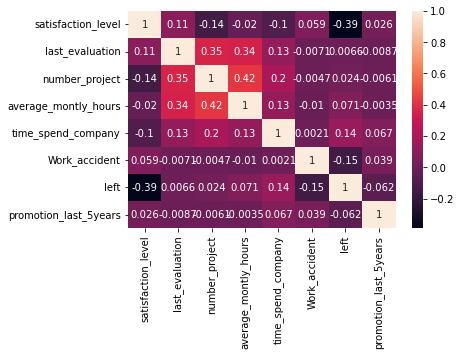

In [7]:
sns.heatmap(df.corr(),annot=True)

### Inferences:
From the above table and heat map we can conclude the following
 * Employees with low satisfaction level tend to leave the firm
 * Employees with more average_monthly_hours tend to leave the firm
 * Employees who were not promoted tend to leave the firm

### Impact of employee salaries on retention

<AxesSubplot:xlabel='salary', ylabel='count'>

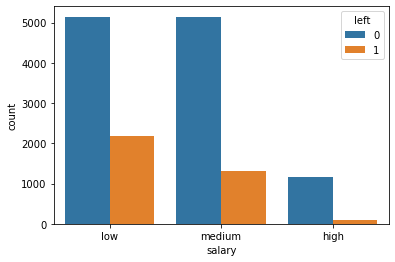

In [8]:
sns.countplot(x=df.salary,hue='left',data=df)

People who get high salary remain in the company.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department', ylabel='count'>

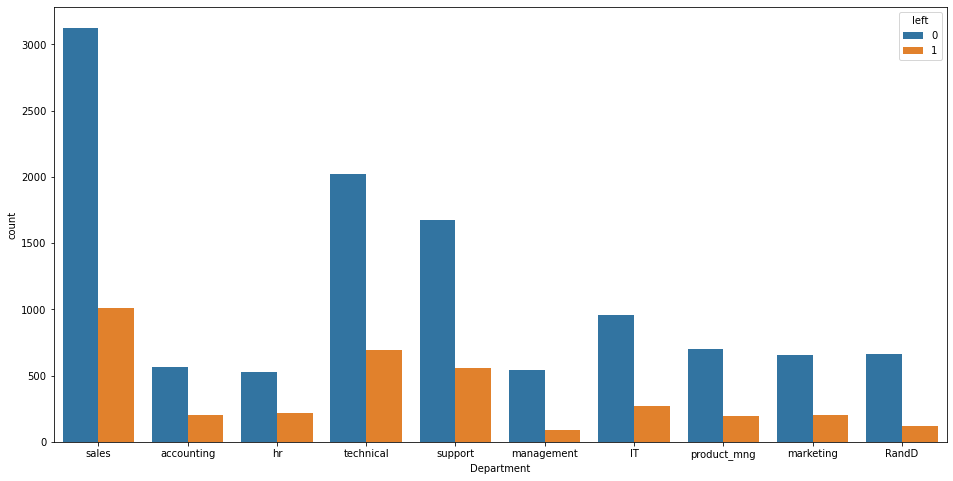

In [9]:
plt.figure(figsize=(16,8))
sns.countplot(df.Department,hue='left',data=df)

There is some impact of department on employee retention

In [10]:
sample_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]

In [11]:
sample_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1
...,...,...,...,...,...
14994,0.40,151,0,low,1
14995,0.37,160,0,low,1
14996,0.37,143,0,low,1
14997,0.11,280,0,low,1


In [12]:
encoded_df=pd.get_dummies(sample_df.salary,prefix="salary")
encoded_df

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [13]:
encoded_df.drop('salary_high',axis=1)

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [14]:
final_df=pd.concat([sample_df,encoded_df],axis=1)
final_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium
0,0.38,157,0,low,1,0,1,0
1,0.80,262,0,medium,1,0,0,1
2,0.11,272,0,medium,1,0,0,1
3,0.72,223,0,low,1,0,1,0
4,0.37,159,0,low,1,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,151,0,low,1,0,1,0
14995,0.37,160,0,low,1,0,1,0
14996,0.37,143,0,low,1,0,1,0
14997,0.11,280,0,low,1,0,1,0


In [15]:
final_df.drop('salary',axis=1,inplace=True)

In [16]:
X=final_df.drop('left',axis=1)
y=final_df.left

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [19]:
clf=LogisticRegression()

In [20]:
clf.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred=clf.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred)

0.7702222222222223

In [23]:
confusion_matrix(y_test,y_pred)

array([[3187,  207],
       [ 827,  279]])

<AxesSubplot:>

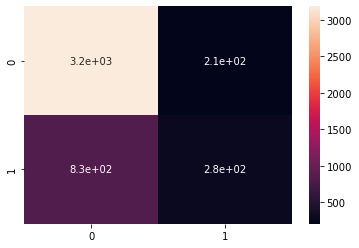

In [24]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)